<a href="https://colab.research.google.com/github/jmorand1/Se-ales/blob/master/Taller1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DESARROLLO TALLER 1**
Juan Sebastián Morán 818048
Universidad Nacional de Colombia - sede Manizales


---



 # **$*$ Punto 1**
Evaluar la expresión

$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \delta\left(2 t - 2 \pi\right)dt \rightarrow Ec.1$$
Nota: Consultar las propiedas de selectividad y escala en eltiempo de la funcion impulso unitario. Comprobar el resultado en simulacion con la librería SymPy.




##Desarrollo
Por propiedades de la función delta de Dirac se tiene que:
$$\int_{-\infty}^{\infty}f(t) \delta\left(t - t_o\right)dt = f(t_o) \rightarrow Ec.2 $$

Así mismo también se sabe que:
$$\delta\left(at - t_o\right) = \mid a \mid^{-1}\delta(x-\frac{t_o}{a}) \rightarrow Ec.3 $$ 

Ahora, tomando $\delta\left(2 t - 2 \pi\right)$ de la Ec.1 y aplicándole la propiedad de la Ec.3 se obtiene que:

$$\delta\left(2 t - 2 \pi\right) = \frac{1}{2}\delta(t-\pi) \rightarrow Ec.4$$

Reemplazando la Ec.4 en la Ec.1 obtenemos:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt \rightarrow Ec.5$$

Finalmente, aplicando la propiedad de la Ec.2 en la Ec.5 se obtiene:
$$\int_{-\infty}^{\infty} t^{2} e^{- \sin{\left (t \right )}} \cos{\left (2 t \right )} \frac{1}{2}\delta(t-\pi)dt = \frac{1}{2}\pi^2e^{-sin(\pi)}cos(2\pi) = \frac{\pi^2}{2} \rightarrow Solucion$$

##Simulación 1

In [1]:
import sympy as sp
from sympy import init_printing
init_printing()
t = sp.symbols('t', real = True)
d = sp.DiracDelta((2*t)-2*(sp.pi))
x = (t**2)*(sp.exp(-(sp.sin(t))))*(sp.cos(2*t))

xi = x*d
xii = sp.integrate(xi,(t,-(sp.oo),sp.oo))
xii

$$\frac{\pi^{2}}{2}$$


---



 # **$*$ Punto 2**
Sea $x(t) = u(t- t_o)- u(t- nt_o)- k\delta (t- mt_o).$ Determine el valor de $k$ para el cual $\int_{-\infty}^{\infty}{x(t)}dt = 0.$ Comprobar el
resultado en simulacion con la librería SymPy.

##Desarrollo
Tomamos:
$$a = u(t- t_o)- u(t- nt_o)$$ 
y
$$ b = k\delta (t- mt_o)$$
así:
$$x(t) = a-b$$

$$\int_{-\infty}^{\infty}{x(t)}dt = \int_{-\infty}^{\infty}adt-\int_{-\infty}^{\infty}bdt = 0$$

Resolvemos $\int_{-\infty}^{\infty}adt$ :
$$\int_{-\infty}^{\infty}adt = \int_{-\infty}^{\infty}u(t- t_o)- u(t- nt_o)dt = \int_{t_o}^{nt_o}dt = \mid nt_o-t_o\mid $$ 

Resolvemos 
$\int_{-\infty}^{\infty}bdt$

$$\int_{-\infty}^{\infty}bdt = \int_{-\infty}^{\infty}k\delta (t- mt_o) = k$$

Por lo tanto:
$$\mid nt_o-t_o\mid-k = 0$$

$$k = \mid nt_o-t_o\mid = \mid t_o(n-1) \mid$$

##Simulación 2

In [2]:
import sympy as sp
from sympy import init_printing
init_printing()
t, to, n, k, m = sp.symbols('t to n k m', real = True)
a = sp.Heaviside(t-to)-sp.Heaviside(t-n*to)
ai = sp.integrate(1,(t,to,n*to))
ai


$$n to - to$$

In [3]:
b = k*sp.DiracDelta(t-m*to)
bi = sp.integrate(b,(t,-(sp.oo),sp.oo))
bi

$$k$$

In [4]:
ec = sp.Eq(ai-bi,0)
sp.solve(ec,k)

Resolviendo para k:
$$k = \left [ to \left(n - 1\right)\right ]$$


---



 # **$*$ Punto 3**
Consulte en que consisten las señales cuasiperiódicas. Luego, demuestre la periodicidad o no de las siguientes señales:

*   $x(t) = 3 cos(\omega t)$
*   $x(t) = 2 sin(\omega t + \pi )$
*   $ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
*   $ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
*   $x(t) = e^{j\omega t}$







##Desarrollo




##• $x(t) = 3 cos(\omega t)$
---
Se hace $x(t-T)$ 

\begin{align}x(t-T)= 3 cos(\omega(t-T))\end{align}

\begin{align}3cos(\omega(t-T))=3[cos(\omega t)cos(\omega T)+sen(\omega t)sen(\omega T)]\end{align}

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$3cos(\omega(t-T)) = 3 [cos(\omega t)cos(\frac{2\pi}{T}T )+sen(\omega t)sen(\frac{2\pi}{T} T)]$$

$$3cos(\omega(t-T))=3[cos(\omega t)]$$ por lo tanto $x(t) = 3 cos(\omega t) = 3cos(\omega (t-T))$ es una función periódica

###**Gráfico**

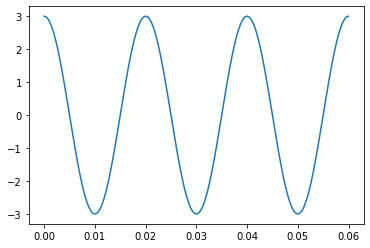

In [5]:
import numpy as np
import matplotlib.pyplot as plt
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 3*np.cos(w*t)
plt.plot(t,x)


##• **$x(t) = 2 sin(\omega t + \pi ) = -2sin(\omega t)$**
---

Se hace $x(t+T)$
$$x(t+T) = 2sin(\omega (t+T) + \pi)$$

$$2sin(\omega (t+T) + \pi) = 2[sin(\omega (t+T))cos(\pi)+sin(\pi)cos(\omega(t+T))]$$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega(t+T))]$$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\omega T)+sin(\omega T)cos(\omega t)]$$

Se remplaza: $\omega = \frac{2\pi}{T_o}$ con $T_o = T$

$$2sin(\omega (t+T) + \pi) = -2[sin(\omega t)cos(\frac{2\pi}{T}T)+sin(\frac{2\pi}{T}T)cos(\omega t)]$$

$$2sin(\omega (t+T) + \pi) = -2sin(\omega t)$$

Por lo tanto $x(t) = 2 sin(\omega t + \pi )  = 2sin(\omega(t+T)+\pi) = -2sin(\omega t) $ y es una función periódica



###**Gráfico**

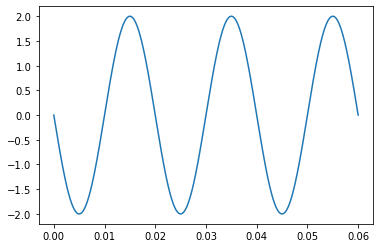

In [6]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = 2*np.sin(w*t+np.pi)
plt.plot(t,x)

##•$ x(t) = 3 sin(\sqrt{3}t) + 3 sin(5t) -  2 cos(t/\sqrt{3})$
---
Revisando las frecuencias angulares se observa como hay $\sqrt{3}$, por lo tanto la función no es cuasiperiódica


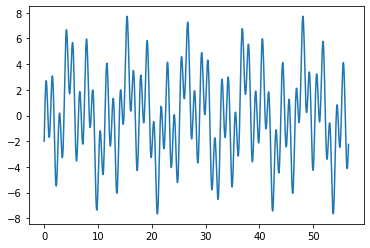

In [14]:
w = 100*np.pi
f = w/(2*np.pi)
T = 6*np.pi
t = np.linspace(0,3*T,1000)
x = 3*np.sin(np.sqrt(3)*t)+3*np.sin(5*t)-2*np.cos(t/np.sqrt(3))
plt.plot(t,x)

##•$ x(t) = 3 sin(4t) -  2 cos(50t) + 2 cos(10t)$
---
Se hace $\omega_1 = 4, \omega_2 = 50, \omega_3 = 10$

$\frac{\omega_1}{\omega_2}, \frac{\omega_1}{\omega_3}, \frac{\omega_2}{\omega_3}$ son entero sobre entero

Se encuentran los periodos:

$T_1 = \frac{\pi}{2}; T_2 = \frac{\pi}{25}; T_3 = \frac{\pi}{5}$

Para facilitar las cosas se multiplica por 50 y se divide entre $\pi$, teniendo que encontrar el mcm de 25, 2, 10 el cuál es ***50***.

Ahora, con la expresión $25k_1=2k_2=10k_3=T=50$ se obtiene los valores de $k_1,k_2$ y $k_3$:

$k_1 = 2$

$k_2 = 25$

$k_3 = 5$

Finalmente remplazando los valores anteriores en la expresión original: $k_1\frac{\pi}{2} = k_2\frac{\pi}{25} = k_3\frac{\pi}{5} = T$

$$T = \pi$$

Y la función es cuasiperiódica

###**Gráfico**

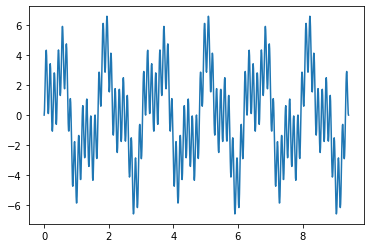

In [8]:
T = np.pi
N = 1000
t = np.linspace(0,3*T,N)
x = 3*np.sin(4*t) - 2*np.cos(50*t) + 2*np.cos(10*t)
plt.plot(t,x)

##• $x(t) = e^{j\omega t}$

Se hace $e^{j\omega (t+T)}$
$$e^{j\omega (t+T)} = e^{ j\omega t}e^{j\omega T}$$ 

Y se expande las funciones en senos y cosenos
$$e^{j\omega(t+T)}=[cos(\omega t)+jsen(\omega t)][cos(\omega T)+jsen(\omega T)]$$

Ahora, remplazamos $\omega$ por $\frac{2\pi}{ T_o}$ con $T_o = T$
$$e^{j\omega(t+T)}=[cos(\omega t)+jsen(\omega t)][cos(2\pi)+jsen(2\pi)]$$

Obteniendo 
$$e^{j\omega(t+T)}=cos(\omega t)+jsen(\omega t) = e^{j\omega t}$$
Por lo tanto $e^{j\omega t}$ es una función periódica

###**Gráfico**

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


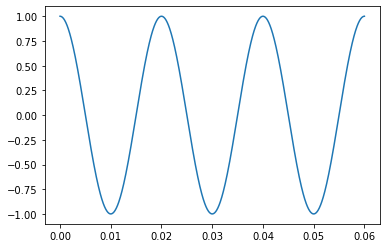

In [9]:
w = 100*np.pi
f = w/(2*np.pi)
T = 1/f
t = np.linspace(0,3*T,1000)
x = np.exp(w*(0+1j)*t)
plt.plot(t,x)


---

 # **$*$ Punto 4**
Clasifique segun su tipo (energía o potencia):


*   $x(t) = - 3t + 1; \forall t \in  [0, 5]$
*   $x(t) = A cos(\omega t) + B sin(\omega t); A, B, \omega  \in  \mathbb{R}^+$
*   $x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$
*   $x[n] = nu[n]; n \in  \{0, \pm 1, \pm 2, . . . , \pm N\}$
*   $x[n] = cos[n\pi ] + sin[2n\pi /3]; n \in  \{0, 1, . . . , N\}; N \in  \mathbb{N}$
*   $x[n] = A cos[n\pi ]u[n -  n_o]; A \in  \mathbb{R}^+$ y $n \in  \{0 \pm 1, \pm 2, . . . , \pm N\}; 0 < n_o < N$



##•$x(t) = - 3t + 1; \forall t \in  [0, 5]$
---
Se hace $E_x = \int_{0}^{5}x(t)^2dt$

$$E_x = \int_{0}^{5}(-3t+1)^2dt$$

$$E_x = \int_{0}^{5}(9t^2-6t+1)dt$$

$$E_x = 3t^3+3t^2+t = t(3t^2+3t+1)\Big|_0^5$$

$$E_x = 0<305<\infty$$

Por lo tanto $x(t)$ es de energía


###**Gráfico**

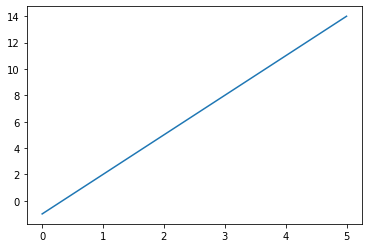

In [10]:
import sympy as sp
from sympy import init_printing
init_printing()
t= sp.symbols('t', real = True)
E= (sp.Abs(3*t-1))**2
Ex = sp.integrate(E,(t,0,5))
##gráfica
tg = np.linspace(0,5,1000)
x = 3*tg-1
plt.plot(tg,x)
Ex

$$E_x = 305$$

##•$x(t) = A cos(\omega t) + B sin(\omega t); A, B, \omega  \in  \mathbb{R}^+$
---
Se hace $E_x =\int_{-T/2}^{T/2} \mid(A cos(\omega t) + B sin(\omega t)\mid^2dt$ con $T_o = \frac{2\pi}{\omega}$


$$E_x = \int_{-T/2}^{T/2} \mid(A cos(\omega t) + B sin(\omega t)\mid^2dt$$

$$E_x = A^2\int_{-T/2}^{T/2} cos^2(\omega t)dt + 2AB\int_{-T/2}^{T/2} cos(\omega t)sin(\omega t)dt+B^2\int_{-T/2}^{T/2} sin^2(\omega t)dt$$

$$E_x = \frac{A^2}{2}(t+\frac{1}{2\omega}sin(2\omega t)) -\frac{AB}{4\omega}cos(2\omega t)+B^2(\frac{1}{2}t-\frac{1}{4\omega}sin(2\omega t))\Big|_{t=T/2}^{t=T/2}$$

$$E_x = \frac{ A^{2}}{2}T_o + \frac{B^{2}}{2}T_o = \frac{T_o}{2}(A^2+B^2)$$

Aplicando el límite:
$$ E_x = \lim_{T_o \to \infty} \frac{T_o}{2}(A^2 + B^2) = \infty$$

Ahora hallamos la potencia 
$$P_x =\frac{T_o}{2T_o}(A^2+B^2) = \frac{1}{2}(A^2+B^2) \rightarrow 0<\frac{1}{2}(A^2+B^2)<\infty$$
**La señal es de potencia**

###**Gráfico**

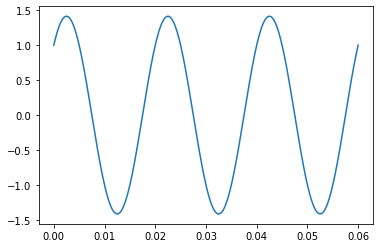

In [11]:
w = 100*np.pi
f = w/(2*np.pi)
To = 1/f
A = 1
B = 1
t = np.linspace(0,3*To,1000)
x = A*np.cos(w*t)+B*np.sin(w*t)
plt.plot(t,x)

##•$x(t) = ate^{- tk} (u(t) -  u(t -  t_o)) ; a, k\in \mathbb{R}; t_o > 0$
---
Se hace $E_x = \int_{-\infty}^{\infty}(ate^{- tk} (u(t) -  u(t -  t_o)))^2dt$

$$E_x = \int_{-\infty}^{\infty}(ate^{- tk} (u(t) -  u(t -  t_o)))^2dt=\int_{0}^{t_o}a^2t^2e^{- 2tk}dt = -\frac{a^2e^{-2kt}\left(2k^2t^2+2kt+1\right)}{4k^3}\Big|_{t = 0}^{t = t_o}$$

$$E_x = \int_{0}^{t_o}a^2t^2e^{-2tk}dt=-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$$


Se evalua $ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3}$ para $k$ positivo y $k$ negativo

$\rightarrow$ **Para $k$ positivo:**
$$ E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \frac{a^2}{4k^3}$$
Por lo tanto la señal es de energía

$\rightarrow$ **Para $k$ negativo:**
$$E_x = \lim_{t_o \to \infty}-\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \infty$$
Entonces se mira si es de potencia:
$$P_x = \lim_{t_o \to \infty}-\frac{1}{t_o}\frac{a^2\left(2k^2e^{-2kt_o}t_o^2+e^{-2kt_o}\left(2kt_o+1\right)-1\right)}{4k^3} = \infty$$
Por lo tanto no es ni de energía ni de potencia.

###**Gráfico**

/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:890: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.6/dist-packages/sympy/plotting/plot.py:891: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax.spines['bottom'].set_smart_bounds(False)


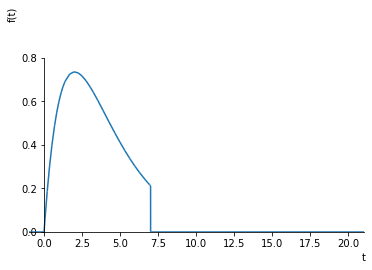

In [12]:
import sympy as sp
from sympy import init_printing
init_printing()
t,a = sp.symbols('t a', real = True)
to = sp.symbols('to', positive = True)
k = sp.symbols('k',positive = True)
f = a*t*sp.exp(-t*k)*(sp.Heaviside(t)-sp.Heaviside(t-to))
sp.plot(f.subs({a: 1, k : 0.5, to : 7}),(t,-1,21))